# DSCI 235 Final Project
### William Acheson

##### I have always hated I-70 traffic, but with the cool ski hills all mostly being up I-70 I have had to suffer through the traffic all my life. With a lot of experience with driving to ski resorts up I-70 I have always felt as if Winter Park is the easiest Ski resort to get to. Why is this? This sparked my project into what it had become.

My main question I am looking to answer
- Why does Winter Park feel more efficient to get too?
  - Using Manifolds can I describe the moments of importance in the graph?
  - Can I look at my data through linear regression to show the importance of certain variables?

Before We look into any of the questions we first must "Wrangle" our data, importing pandas and numpy to help us along the way.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


First we must define some functions:

In [2]:

# Makes the only dates in the data frame during ski season
def make_dataframe_calender(data):
    data["FormattedDate"] = pd.to_datetime(data["FormattedDate"])
    data["WhatMonth"] = data["FormattedDate"].dt.month
    months = [11, 12, 1, 2, 3, 4, 5]
    data = data[data["WhatMonth"].isin(months)]
    return data

# Makes my data only weekend days
def to_weekend(data):
    data = data[data['FormattedDate'].dt.dayofweek >= 5]
    return data

# Generates the snow data that I will compare the traffic data with
def graphSnow_x(x=7):
    file = "GRANBY.csv"
    new_file = pd.read_csv(file)
    data = pd.DataFrame(new_file)
    file = "FRISCO.csv"
    new_file = pd.read_csv(file)
    other_data = pd.DataFrame(new_file)
    data = pd.concat([data, other_data])
    data['DATE'] = pd.to_datetime(data['DATE'])
    data['DOY'] = data['DATE'].dt.dayofyear
    data['YEAR'] = data['DATE'].dt.year
    data['PRCP'] = pd.to_numeric(data['PRCP'], errors='coerce')
    data['SNOW'] = pd.to_numeric(data['SNOW'], errors='coerce')
    data.dropna(subset=['SNOW'], inplace=True)
    data['SNOW_DAY_SUM'] = data['SNOW'].rolling(window=x).sum()
    return data

# Gets the data from 2014-2024 for the given type of data to extract from
# I didn't use 2020 because covid skewed my data so much it changed my answers
def weekdays_total_graph(type="AF"):
    ret_data = pd.DataFrame()
    if(type == "AF"):
        for j in range(2014, 2025):
            if j != 2020:
                base_data = AF_data(j)
                base_data = base_data[base_data["COUNTDIR"] == 'S']
                base_data.reset_index(drop=True, inplace=True)
                base_data = std_df(base_data)
                base_data = mean_df(base_data)
                base_data['FormattedDate'] = pd.to_datetime(base_data['FormattedDate'])
                base_data['DOY'] = base_data['FormattedDate'].dt.dayofyear
                base_data['YEAR'] = base_data['FormattedDate'].dt.year
                base_data = base_data[base_data['FormattedDate'].dt.month.isin([datetime.now().month])]
                base_data = base_data[base_data['FormattedDate'].dt.month.isin([11,12,1,2,3,4,5])]
                ret_data = pd.concat([ret_data, base_data])
    elif(type == "ET"):
        for j in range(2014, 2025):
            if j != 2020:
                base_data = ET_data(j)
                base_data = base_data[base_data["COUNTDIR"] == 'S']
                base_data.reset_index(drop=True, inplace=True)
                base_data = std_df(base_data)
                base_data = mean_df(base_data)
                base_data['FormattedDate'] = pd.to_datetime(base_data['FormattedDate'])
                base_data['DOY'] = base_data['FormattedDate'].dt.dayofyear
                base_data['YEAR'] = base_data['FormattedDate'].dt.year
                base_data = base_data[base_data['FormattedDate'].dt.month.isin([datetime.now().month])]
                base_data = base_data[base_data['FormattedDate'].dt.month.isin([11,12,1,2,3,4,5])]
                ret_data = pd.concat([ret_data, base_data])
    elif(type == "BP"):
        for j in range(2014, 2025):
            if j != 2020:
                base_data = BP_data(j)
                base_data = base_data[base_data["COUNTDIR"] == 'S']
                base_data.reset_index(drop=True, inplace=True)
                base_data = std_df(base_data)
                base_data = mean_df(base_data)
                base_data['FormattedDate'] = pd.to_datetime(base_data['FormattedDate'])
                base_data['DOY'] = base_data['FormattedDate'].dt.dayofyear
                base_data['YEAR'] = base_data['FormattedDate'].dt.year
                base_data = base_data[base_data['FormattedDate'].dt.month.isin([datetime.now().month])]
                base_data = base_data[base_data['FormattedDate'].dt.month.isin([11,12,1,2,3,4,5])]
                ret_data = pd.concat([ret_data, base_data])
    return ret_data



# Gets the after-floyd data set
def AF_data(inp):
    inp = str(inp)
    Csv_Import = "AFTERFLOYD_TD\\" + inp + ".csv"
    csv_read = pd.read_csv(Csv_Import)
    return csv_read

# Gets the Berthoud-Pass data set
def BP_data(inp):
    inp = str(inp)
    Csv_Import = "BERTHODPASS_TD\\"+ inp + ".csv"
    csv_read = pd.read_csv(Csv_Import)
    csv_output = pd.DataFrame(csv_read)
    return csv_output

# Gets the Eisenhower-Tunnel data set
def ET_data(inp):
    inp = str(inp)
    Csv_Import = "EISENHOWERTUNNEL_TD\\"+ inp + ".csv"
    csv_read = pd.read_csv(Csv_Import)
    csv_output = pd.DataFrame(csv_read)
    return csv_output

# Drops unused data
def remove_counts(data):
    return data.drop(["COUNTSTATIONID","COUNTDATE","COUNTDIR","FormattedDate"], axis=1)

# Adds a collumn called mean, that is the average of the hours
def mean_df(data):
    data['Mean'] = data.loc[:, 'HOUR0':'HOUR23'].mean(axis=1)
    return data

# Adds a collumn called Std, that is the Std of the hours
def std_df(data):
    data['Std'] = data.loc[:, 'HOUR0':'HOUR23'].std(axis=1)
    return data

# Makes a dataframe that I can use consistently 
def make_total_data(hour=7, t="AF",mean=False, window=7):
    if(not mean):
        hour = f"HOUR{hour}"
        traffic_data = weekdays_total_graph(type=t)
        snow_data = graphSnow_x(window)
        snow_data.rename(columns={'DOY': 'Snow_DOY', 'YEAR': 'Snow_YEAR'}, inplace=True)
        merged_data = pd.merge(traffic_data, snow_data, left_on=['DOY', 'YEAR'], right_on=['Snow_DOY', 'Snow_YEAR'], how='inner')
        merged_data = to_weekend(merged_data)
        new_data = merged_data.loc[:, [hour,'SNOW_DAY_SUM', 'Snow_DOY']]
        new_data.dropna(subset=['SNOW_DAY_SUM'], inplace=True)
    else:
        traffic_data = weekdays_total_graph(type=t)
        snow_data = graphSnow_x(window)
        snow_data.rename(columns={'DOY': 'Snow_DOY', 'YEAR': 'Snow_YEAR'}, inplace=True)
        merged_data = pd.merge(traffic_data, snow_data, left_on=['DOY', 'YEAR'], right_on=['Snow_DOY', 'Snow_YEAR'], how='inner')
        merged_data = to_weekend(merged_data)
        new_data = merged_data.loc[:, ["Mean",'SNOW_DAY_SUM', 'Snow_DOY']]
        new_data.dropna(subset=['SNOW_DAY_SUM'], inplace=True)
    
    return new_data

Graphing the now data we have collected we can get the data for the direction to the mountains, and graphed it with the snow total for the previous 7 days. With this data that we are collecting we are looking at once specific data set, that is going to ski on the weekend. What does this mean?
- Only graphing weekend days, and months November -through- May
- Then we are exclusively getting data from hour 7, which is 7:00am - 7:59am

I would like to note before looking at the actual data what type of data I am working with
- Traffic data -> A time series of data that has to do with how many cars go through a certain checkpoint in an hour. I have collected this data straight from Colorado Department of Transport from their website.

- Snow data -> Data that is also in a time series, this data has to do with the total amount of snow that fell on the graphed day. The data I will be working wth .rolling(window=x).sum() so I can take the previous couple days of snowfall and add them together, this is because sometimes more people go skiing on the weekend because it snowed wednesday. I have collected this data from the national weather service.

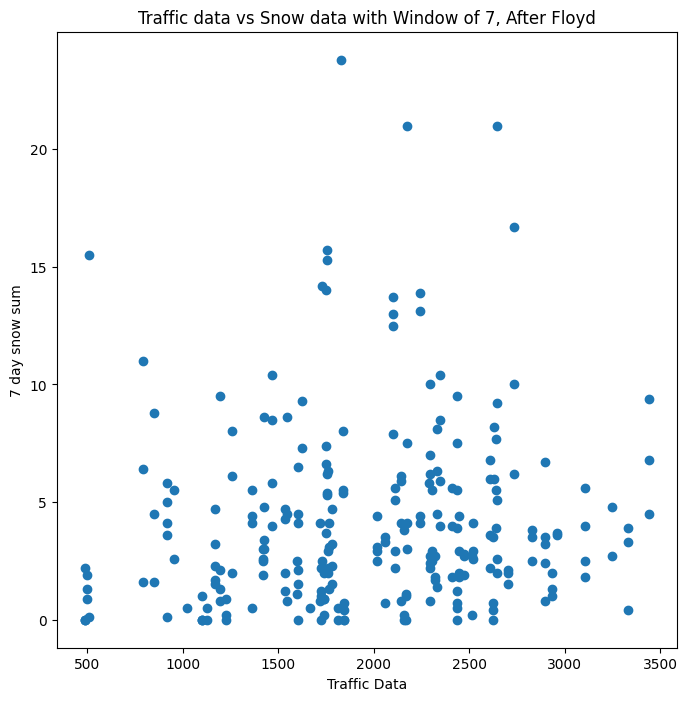

In [3]:
data_AF = make_total_data(t="AF")
plt.figure(figsize=(8,8))
AF_scatter = plt.scatter(data_AF["HOUR7"], data_AF["SNOW_DAY_SUM"])
plt.title("Traffic data vs Snow data with Window of 7, After Floyd")
plt.xlabel("Traffic Data")
plt.ylabel("7 day snow sum")
plt.show()

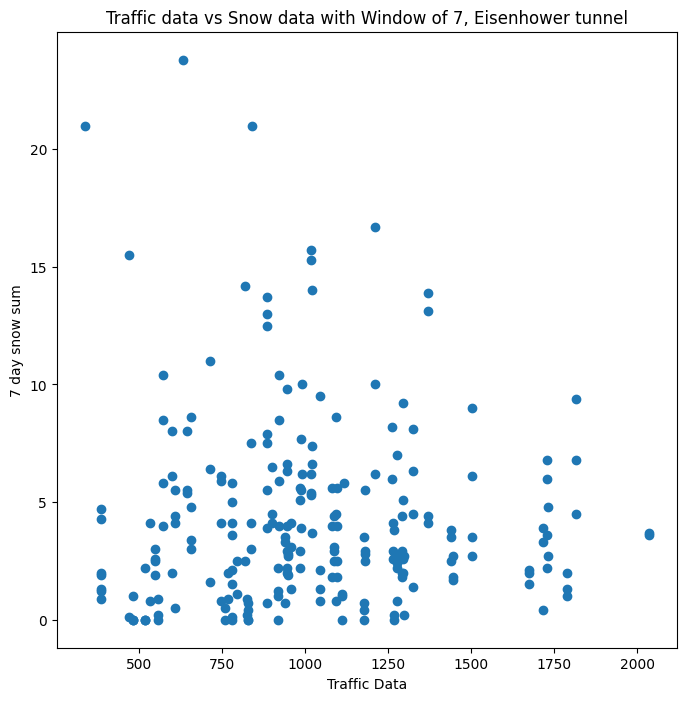

In [4]:
data_ET = make_total_data(t="ET")
plt.figure(figsize=(8,8))
ET_scatter = plt.scatter(data_ET["HOUR7"], data_ET["SNOW_DAY_SUM"])
plt.title("Traffic data vs Snow data with Window of 7, Eisenhower tunnel")
plt.xlabel("Traffic Data")
plt.ylabel("7 day snow sum")
plt.show()

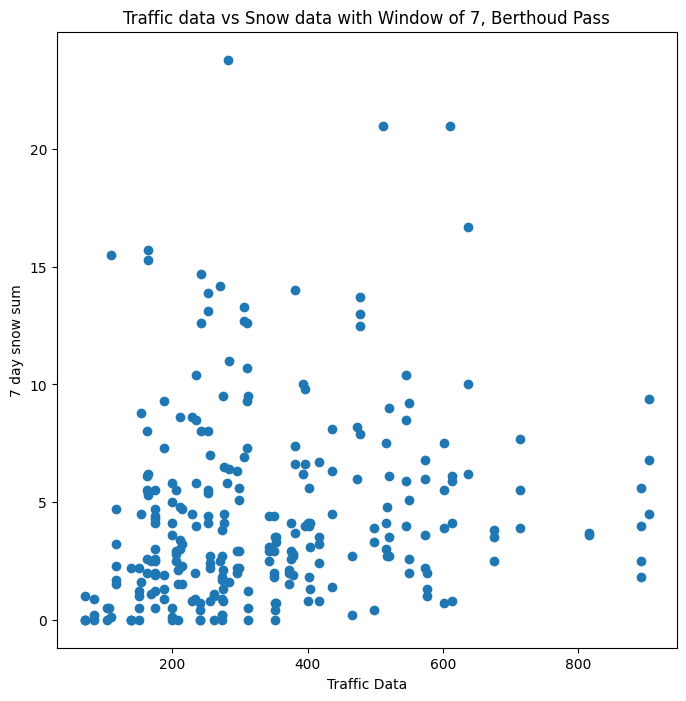

In [5]:
data_BP = make_total_data(t="BP")
plt.figure(figsize=(8,8))
BP_scatter = plt.scatter(data_BP["HOUR7"], data_BP["SNOW_DAY_SUM"])
plt.title("Traffic data vs Snow data with Window of 7, Berthoud Pass")
plt.xlabel("Traffic Data")
plt.ylabel("7 day snow sum")
plt.show()

### -1- Why does Winter Park feel more efficient to get too?


Berhtoud Pass: The main and the only viable way to Winter Park from I-70. Due to this I will be looking at comparing the Bethoud Pass data set to the Eisenhower Tunnel data set, with the center value to be the After Floyd hill data.

As we can see above all three graphs follow closely the same trends, however it is easy to notice the difference in cars per hour when comparing many of these traffic data sets. Berthoud pass has a significantly less average of cars per hour as apposed to Eisenhower Tunnel. We know this to be the case for many reasons.
- Weather on Berthoud may hault cars more than I-70.
- Berthoud Pass is only half the time a 2 lane road, with a much lower speed limit.
- There is only one resort thats up Berthoud pass, which is Winter Park

The next step would be to test sorting algorithms. It is hard to see what is going on with my data as of right now so we will be using clustering. The most efficient algorithm to use has the best *accuracy*. This way I can find the trends of the data and check for if they line up with one another.

In [6]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
from sklearn_som.som import SOM

### Alomerative Clustering

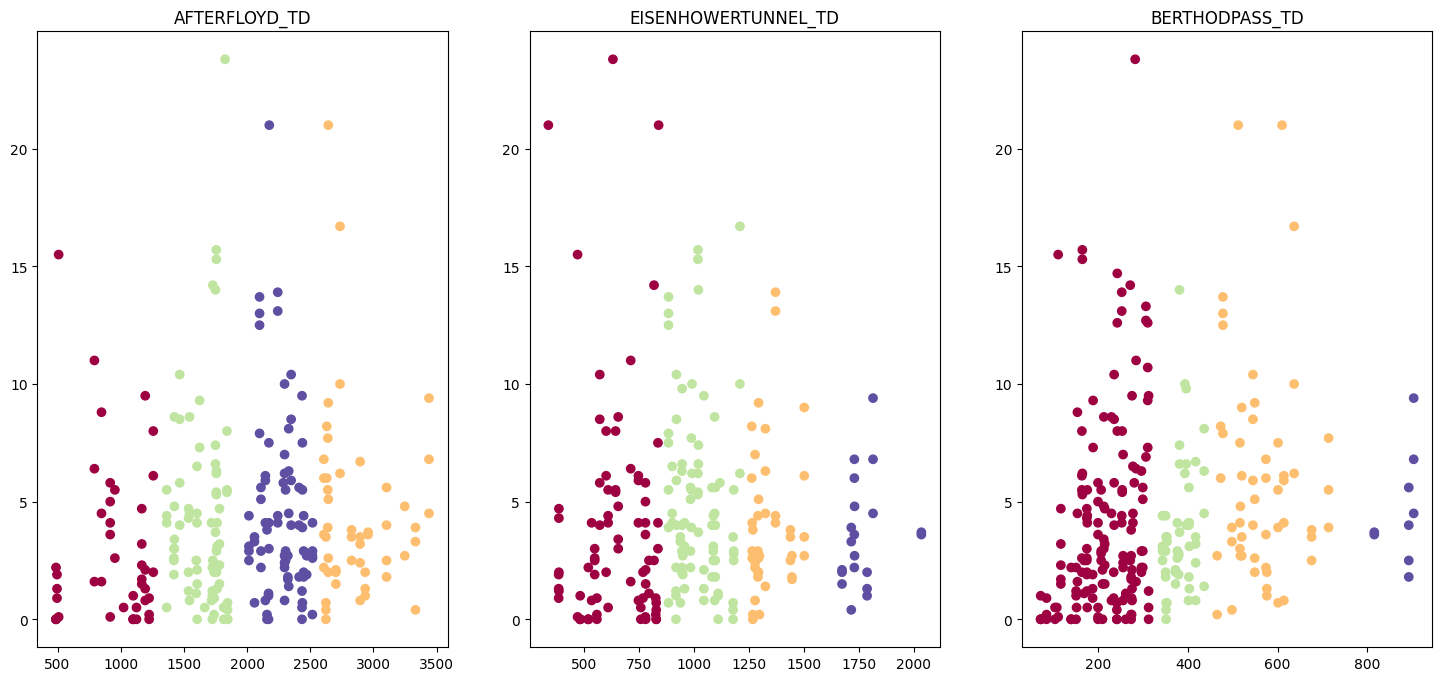

In [7]:

agg = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
agg.fit(data_AF[["HOUR7", 'SNOW_DAY_SUM']])
labels_af = agg.labels_

agg = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
agg.fit(data_ET[['HOUR7', 'SNOW_DAY_SUM']])
labels_et = agg.labels_

agg = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
agg.fit(data_BP[['HOUR7', 'SNOW_DAY_SUM']])
labels_bp = agg.labels_

fig, ax = plt.subplots(1,3, figsize=(18,8))

ax[0].scatter(data_AF['HOUR7'], data_AF['SNOW_DAY_SUM'], c=labels_af, cmap="Spectral")
ax[0].set_title("AFTERFLOYD_TD")

ax[1].scatter(data_ET['HOUR7'], data_ET['SNOW_DAY_SUM'], c=labels_et, cmap="Spectral")
ax[1].set_title("EISENHOWERTUNNEL_TD")

ax[2].scatter(data_BP['HOUR7'], data_BP['SNOW_DAY_SUM'], c=labels_bp, cmap="Spectral")
ax[2].set_title("BERTHODPASS_TD")

plt.show()

### Kmeans

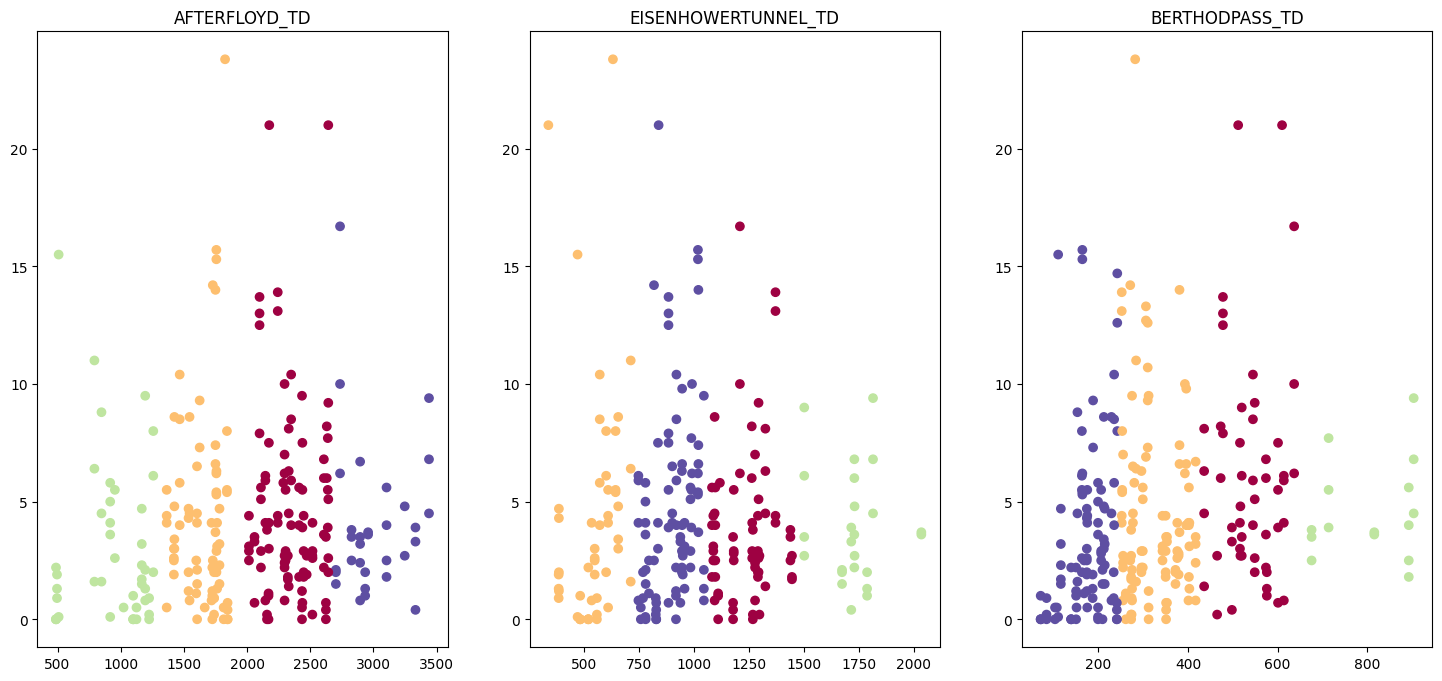

In [8]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_AF[["HOUR7", 'SNOW_DAY_SUM']])
labels_af = kmeans.labels_

kmeans = KMeans(n_clusters=4)
kmeans.fit(data_ET[['HOUR7', 'SNOW_DAY_SUM']])
labels_et = kmeans.labels_

kmeans = KMeans(n_clusters=4)
kmeans.fit(data_BP[['HOUR7', 'SNOW_DAY_SUM']])
labels_bp = kmeans.labels_

fig, ax = plt.subplots(1,3, figsize=(18,8))

ax[0].scatter(data_AF['HOUR7'], data_AF['SNOW_DAY_SUM'], c=labels_af, cmap="Spectral")
ax[0].set_title("AFTERFLOYD_TD")

ax[1].scatter(data_ET['HOUR7'], data_ET['SNOW_DAY_SUM'], c=labels_et, cmap="Spectral")
ax[1].set_title("EISENHOWERTUNNEL_TD")

ax[2].scatter(data_BP['HOUR7'], data_BP['SNOW_DAY_SUM'], c=labels_bp, cmap="Spectral")
ax[2].set_title("BERTHODPASS_TD")

plt.show()


### DBScan

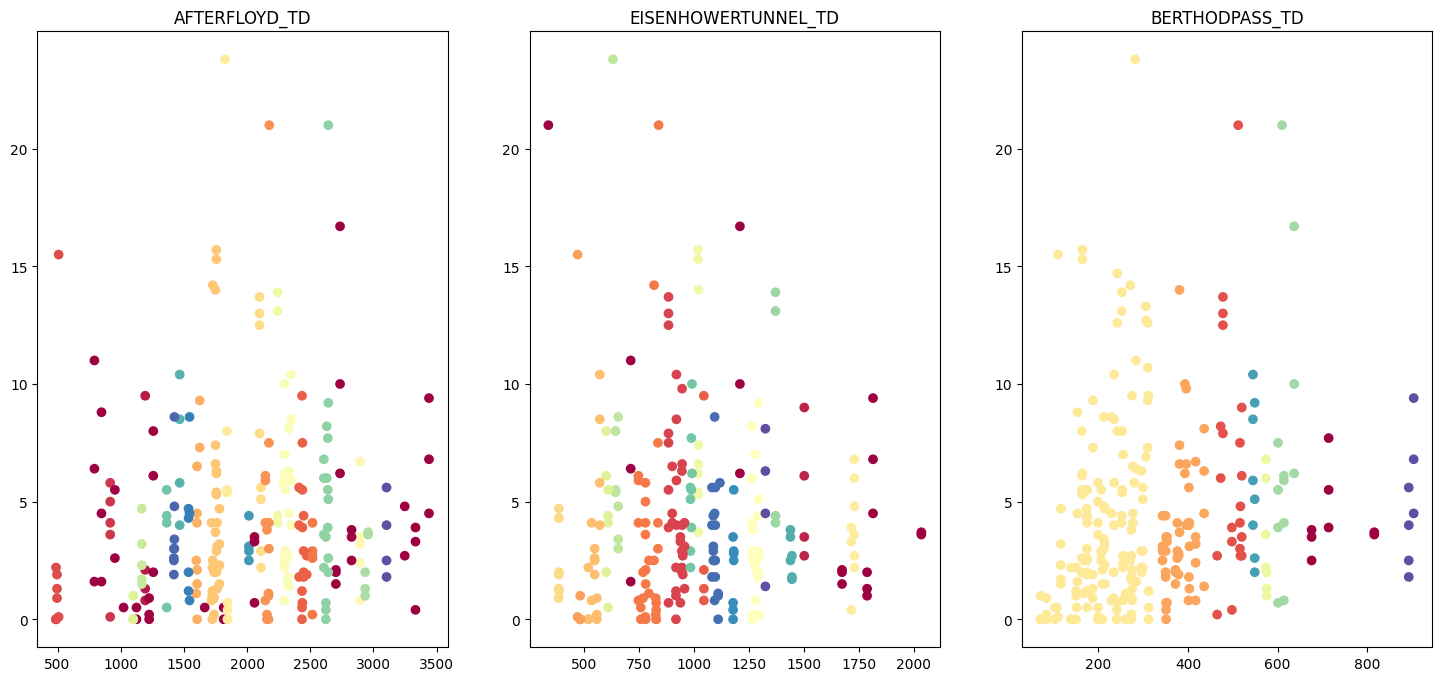

In [9]:
dbscan = DBSCAN(eps=25,min_samples = 4)
dbscan.fit(data_AF[["HOUR7", 'SNOW_DAY_SUM']])
labels_af = dbscan.labels_

dbscan = DBSCAN(eps=25,min_samples = 4)
dbscan.fit(data_ET[['HOUR7', 'SNOW_DAY_SUM']])
labels_et = dbscan.labels_

dbscan = DBSCAN(eps=25,min_samples = 4)
dbscan.fit(data_BP[['HOUR7', 'SNOW_DAY_SUM']])
labels_bp = dbscan.labels_

fig, ax = plt.subplots(1,3, figsize=(18,8))

ax[0].scatter(data_AF['HOUR7'], data_AF['SNOW_DAY_SUM'], c=labels_af, cmap="Spectral")
ax[0].set_title("AFTERFLOYD_TD")

ax[1].scatter(data_ET['HOUR7'], data_ET['SNOW_DAY_SUM'], c=labels_et, cmap="Spectral")
ax[1].set_title("EISENHOWERTUNNEL_TD")

ax[2].scatter(data_BP['HOUR7'], data_BP['SNOW_DAY_SUM'], c=labels_bp, cmap="Spectral")
ax[2].set_title("BERTHODPASS_TD")

plt.show()
    


### Self Organizing map

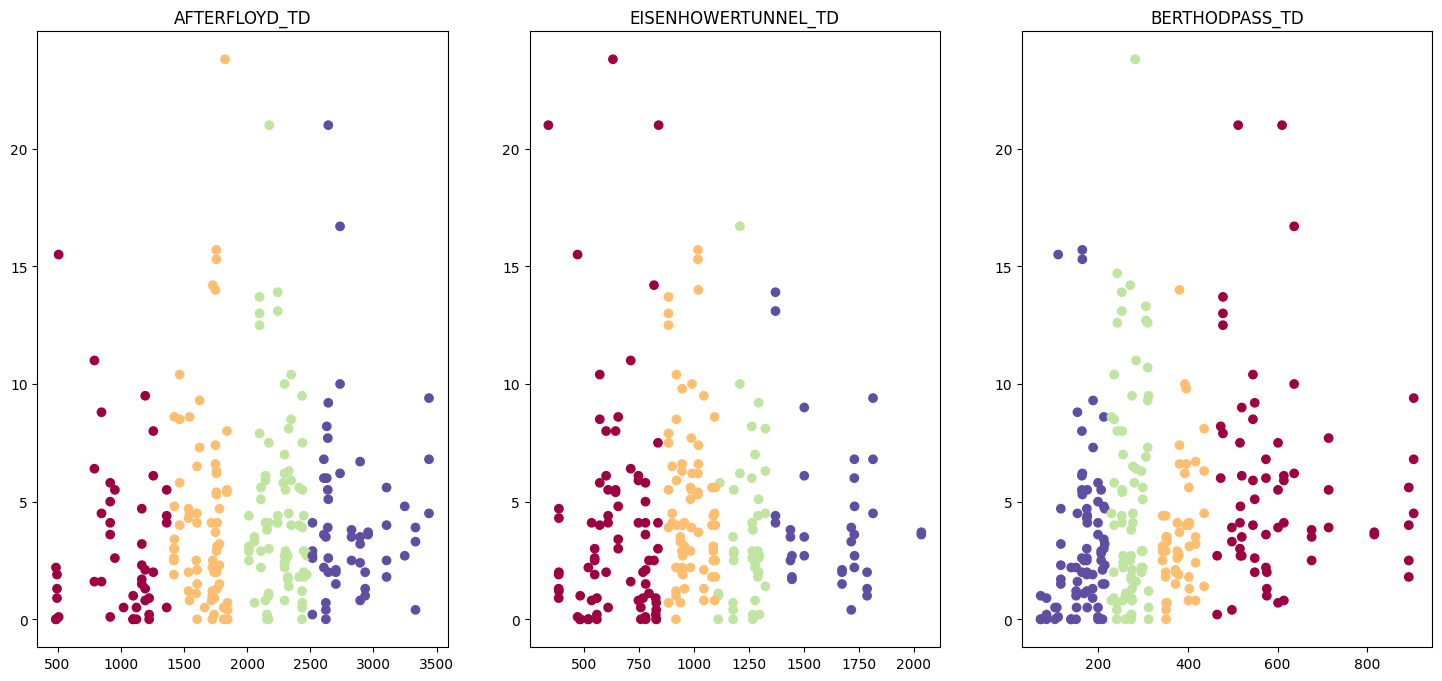

In [10]:
som_data_AF = data_AF[["HOUR7", 'SNOW_DAY_SUM']].values
som_data = SOM(m=4, n=1, dim=2)
som_data.fit(som_data_AF)
predictions_af = som_data.predict(som_data_AF)

som_data_ET = data_ET[["HOUR7", 'SNOW_DAY_SUM']].values
som_data = SOM(m=4, n=1, dim=2)
som_data.fit(som_data_ET)
predictions_et = som_data.predict(som_data_ET)


som_data_BP = data_BP[["HOUR7", 'SNOW_DAY_SUM']].values
som_data = SOM(m=4, n=1, dim=2)
som_data.fit(som_data_BP)
predictions_bp = som_data.predict(som_data_BP)

fig, ax = plt.subplots(1,3, figsize=(18,8))

ax[0].scatter(data_AF['HOUR7'], data_AF['SNOW_DAY_SUM'], c=predictions_af, cmap="Spectral")
ax[0].set_title("AFTERFLOYD_TD")

ax[1].scatter(data_ET['HOUR7'], data_ET['SNOW_DAY_SUM'], c=predictions_et, cmap="Spectral")
ax[1].set_title("EISENHOWERTUNNEL_TD")

ax[2].scatter(data_BP['HOUR7'], data_BP['SNOW_DAY_SUM'], c=predictions_bp, cmap="Spectral")
ax[2].set_title("BERTHODPASS_TD")

plt.show()

After trying a bunch of sorting algorithims we can see that it is very obvious that some work better than others. Due this data being time series compared to time series, this would explaing why DBSCAN doesn't work and provides us with some very missinterpreted data. The next sorting algorithim I would like ot rule out is kmeans. Its ok, but it is also naive and won't properly sort our data. This leaves Agglomerative clustering with Ward and Self Organized maps. Both of these work some what well but I will give the edge to the Self organizing map as it works a little better when looking at the loose data on the higher end of the traffic per hour. 

So why do all of this work?
- I wanted to brief the data before manipulating it to show, where the points are going. This is notable when looking at UMAP, which will be used next.
- Its hard to make sense of our data when it is unsorted.
- Before breaking down the data we can see there exists 4 main categories, these all being seperated by drive time.

What defines an efficient drive?
- Less traffic means that you will have to wait less.
- Less Cars will make the road feel less congested

How can we tell the difference between less cars on the road and actual traffic?

We can do this with the idea of manifolds!
- We can find the trends of our data when looking through manifolds.
- Although this is true, manifolds tend to come from higher dimensional data, like 4 or 5 different data sets graphed together. So with my data already being in 2 dimensions how can I look at the manifolds?
- The answer is easier than it needed to be. With my data being two time series data sets graphed with one another, this is my way to get around the multidimensional restriction.
- After looking around I found that UMAP, Uniform Manifold Approximation And Projection works great for this.

In [11]:
import umap.umap_ as umap
from sklearn.discriminant_analysis import StandardScaler

C:\Users\wsach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


C:\Users\wsach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\wsach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\wsach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


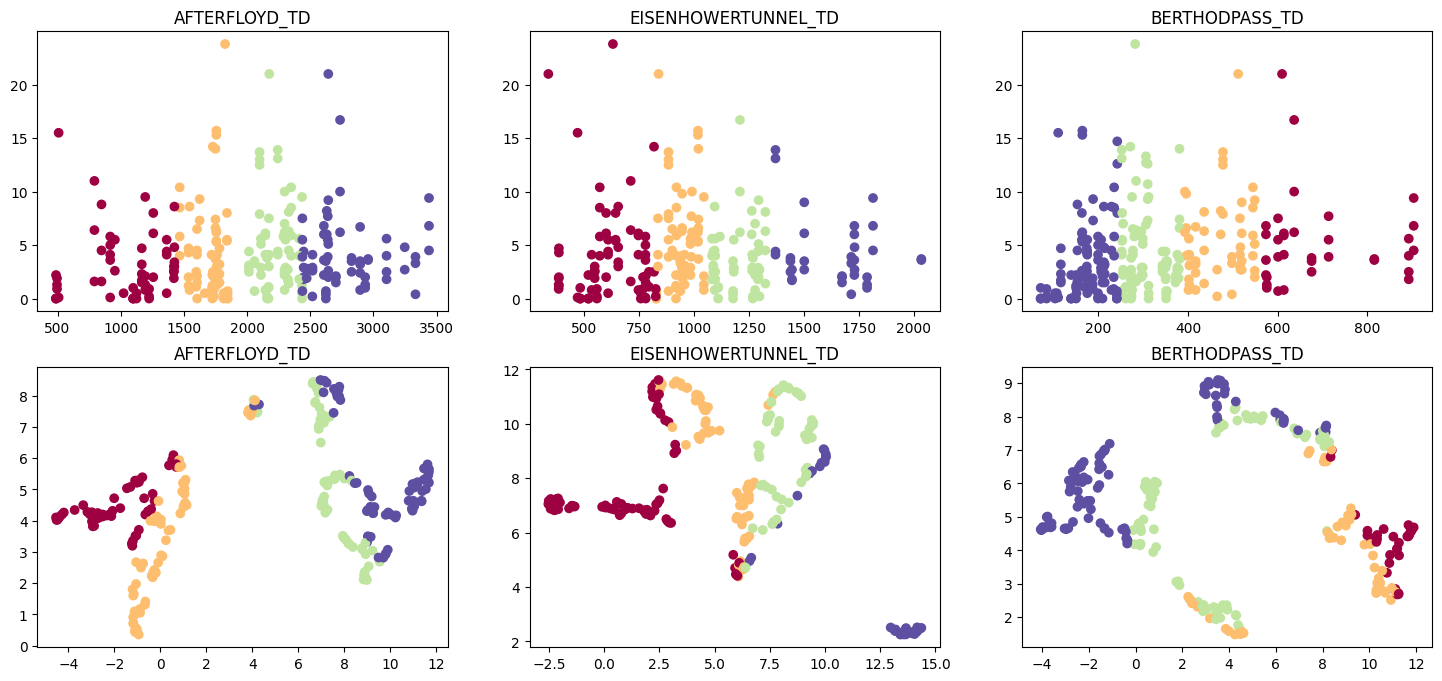

In [12]:
som_data_AF = data_AF[["HOUR7", 'SNOW_DAY_SUM']].values
som_data = SOM(m=4, n=1, dim=2)
som_data.fit(som_data_AF)
predictions_af = som_data.predict(som_data_AF)

reducer = umap.UMAP()
umap_data = som_data_AF
scaler = StandardScaler()
scaled_umap_data = scaler.fit_transform(umap_data)
embedded_data_af = reducer.fit_transform(scaled_umap_data)




som_data_ET = data_ET[["HOUR7", 'SNOW_DAY_SUM']].values
som_data = SOM(m=4, n=1, dim=2)
som_data.fit(som_data_ET)
predictions_et = som_data.predict(som_data_ET)

reducer = umap.UMAP()
umap_data = som_data_ET
scaler = StandardScaler()
scaled_umap_data = scaler.fit_transform(umap_data)
embedded_data_et = reducer.fit_transform(scaled_umap_data)




som_data_BP = data_BP[["HOUR7", 'SNOW_DAY_SUM']].values
som_data = SOM(m=4, n=1, dim=2)
som_data.fit(som_data_BP)
predictions_bp = som_data.predict(som_data_BP)

reducer = umap.UMAP()
umap_data = som_data_BP
scaler = StandardScaler()
scaled_umap_data = scaler.fit_transform(umap_data)
embedded_data_bp = reducer.fit_transform(scaled_umap_data)


fig, ax = plt.subplots(2,3, figsize=(18,8))

ax[0,0].scatter(data_AF['HOUR7'], data_AF['SNOW_DAY_SUM'], c=predictions_af, cmap="Spectral")
ax[0,0].set_title("AFTERFLOYD_TD")

ax[0,1].scatter(data_ET['HOUR7'], data_ET['SNOW_DAY_SUM'], c=predictions_et, cmap="Spectral")
ax[0,1].set_title("EISENHOWERTUNNEL_TD")

ax[0,2].scatter(data_BP['HOUR7'], data_BP['SNOW_DAY_SUM'], c=predictions_bp, cmap="Spectral")
ax[0,2].set_title("BERTHODPASS_TD")

ax[1,0].scatter(embedded_data_af[:, 0], embedded_data_af[:, 1], c=predictions_af, cmap="Spectral")
ax[1,0].set_title("AFTERFLOYD_TD")

ax[1,1].scatter(embedded_data_et[:, 0], embedded_data_et[:, 1], c=predictions_et, cmap="Spectral")
ax[1,1].set_title("EISENHOWERTUNNEL_TD")

ax[1,2].scatter(embedded_data_bp[:, 0], embedded_data_bp[:, 1], c=predictions_bp, cmap="Spectral")
ax[1,2].set_title("BERTHODPASS_TD")

plt.show()


Although this looks nice, umap does a lot better when we expand our number of clusters, so lets try 8 clusters

C:\Users\wsach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\wsach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\wsach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


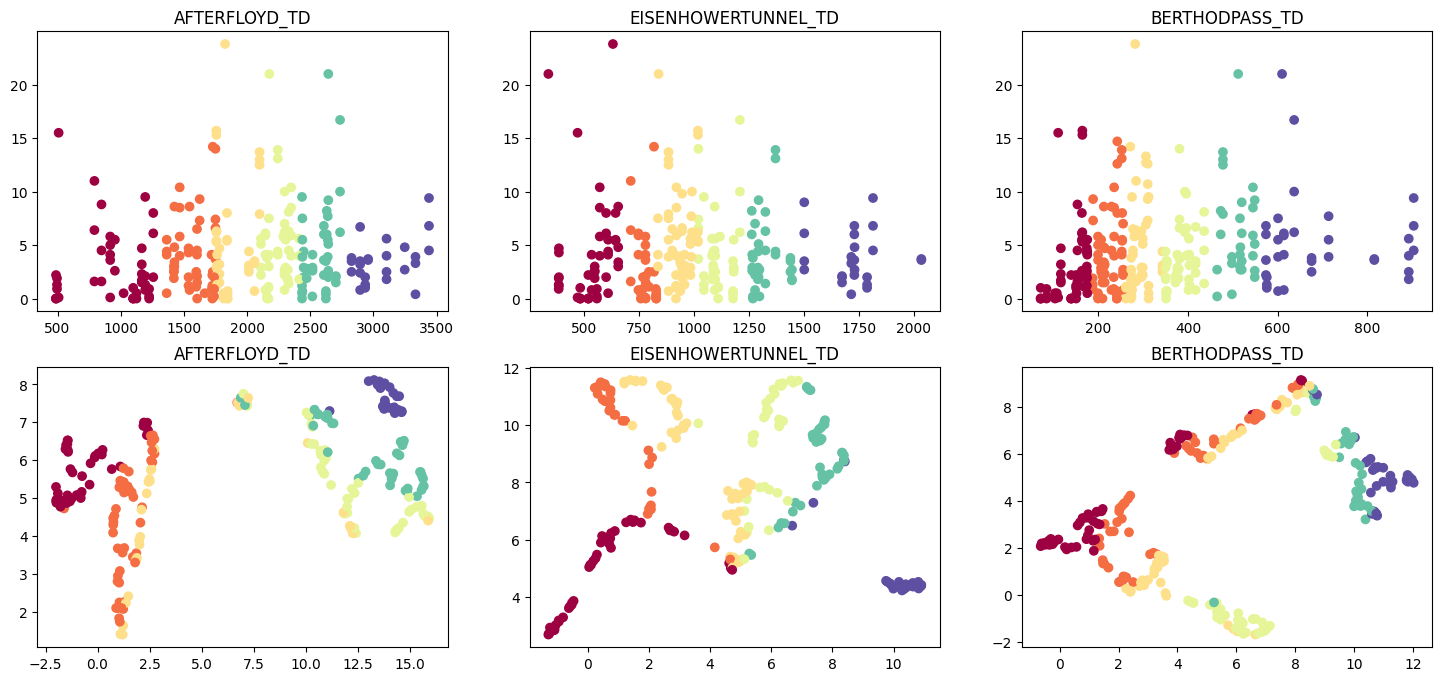

In [13]:
som_data_AF = data_AF[["HOUR7", 'SNOW_DAY_SUM']].values
som_data = SOM(m=6, n=1, dim=2)
som_data.fit(som_data_AF)
labels_af = som_data.predict(som_data_AF)

reducer = umap.UMAP()
umap_data = som_data_AF
scaler = StandardScaler()
scaled_umap_data = scaler.fit_transform(umap_data)
embedded_data_af = reducer.fit_transform(scaled_umap_data)




som_data_ET = data_ET[["HOUR7", 'SNOW_DAY_SUM']].values
som_data = SOM(m=6, n=1, dim=2)
som_data.fit(som_data_ET)
labels_et = som_data.predict(som_data_ET)

reducer = umap.UMAP()
umap_data = som_data_ET
scaler = StandardScaler()
scaled_umap_data = scaler.fit_transform(umap_data)
embedded_data_et = reducer.fit_transform(scaled_umap_data)




som_data_BP = data_BP[["HOUR7", 'SNOW_DAY_SUM']].values
som_data = SOM(m=6, n=1, dim=2)
som_data.fit(som_data_BP)
labels_bp = som_data.predict(som_data_BP)

reducer = umap.UMAP()
umap_data = som_data_BP
scaler = StandardScaler()
scaled_umap_data = scaler.fit_transform(umap_data)
embedded_data_bp = reducer.fit_transform(scaled_umap_data)


fig, ax = plt.subplots(2,3, figsize=(18,8))

scatter = ax[0,0].scatter(data_AF['HOUR7'], data_AF['SNOW_DAY_SUM'], c=labels_af, cmap="Spectral")
ax[0,0].set_title("AFTERFLOYD_TD")

scatter = ax[0,1].scatter(data_ET['HOUR7'], data_ET['SNOW_DAY_SUM'], c=labels_et, cmap="Spectral")
ax[0,1].set_title("EISENHOWERTUNNEL_TD")

scatter = ax[0,2].scatter(data_BP['HOUR7'], data_BP['SNOW_DAY_SUM'], c=labels_bp, cmap="Spectral")
ax[0,2].set_title("BERTHODPASS_TD")

scatter = ax[1,0].scatter(embedded_data_af[:, 0], embedded_data_af[:, 1], c=labels_af, cmap="Spectral")
ax[1,0].set_title("AFTERFLOYD_TD")

scatter = ax[1,1].scatter(embedded_data_et[:, 0], embedded_data_et[:, 1], c=labels_et, cmap="Spectral")
ax[1,1].set_title("EISENHOWERTUNNEL_TD")

scatter = ax[1,2].scatter(embedded_data_bp[:, 0], embedded_data_bp[:, 1], c=labels_bp, cmap="Spectral")
ax[1,2].set_title("BERTHODPASS_TD")

plt.show()


As we can see above, we can now visualize where our data is coming from for our umap function. Why this is important is because umap doesn't have any specific x and y values we can set to find what data point we are analyzing. Thanks to the sorting algorithm we can easily find where our data is coming from. Allowing for me to realize that all the work I did with clustering the clusters don't show the trends of the graph great as many of the clusters are all over the place.

After reading the graphs I figured I would attempt to use the scanning methods to re-cluster our data this time, but now with the umap transformation.

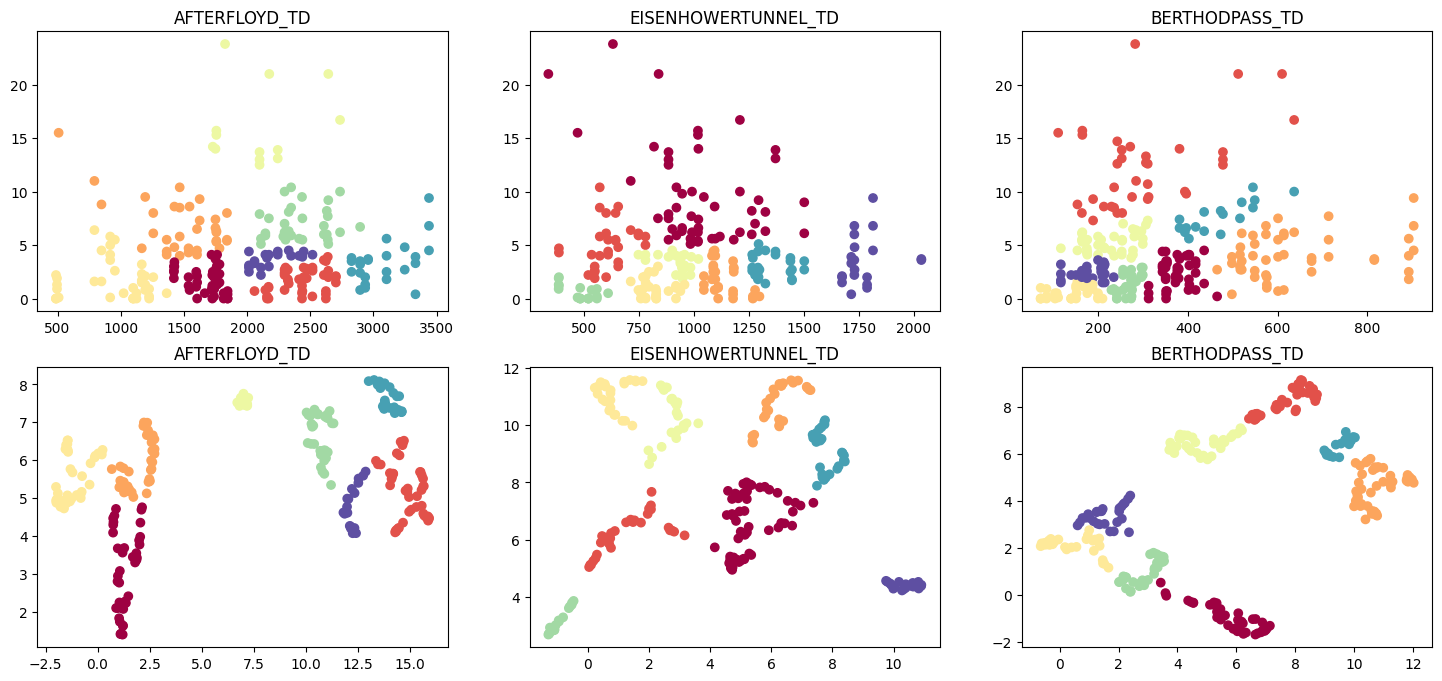

In [14]:
agg = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='ward')
agg.fit(embedded_data_af)
labels_af = agg.labels_

agg = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='ward')
agg.fit(embedded_data_et)
labels_et = agg.labels_

agg = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='ward')
agg.fit(embedded_data_bp)
labels_bp = agg.labels_

fig, ax = plt.subplots(2,3, figsize=(18,8))

scatter = ax[0,0].scatter(data_AF['HOUR7'], data_AF['SNOW_DAY_SUM'], c=labels_af, cmap="Spectral")
ax[0,0].set_title("AFTERFLOYD_TD")

scatter = ax[0,1].scatter(data_ET['HOUR7'], data_ET['SNOW_DAY_SUM'], c=labels_et, cmap="Spectral")
ax[0,1].set_title("EISENHOWERTUNNEL_TD")

scatter = ax[0,2].scatter(data_BP['HOUR7'], data_BP['SNOW_DAY_SUM'], c=labels_bp, cmap="Spectral")
ax[0,2].set_title("BERTHODPASS_TD")

scatter = ax[1,0].scatter(embedded_data_af[:, 0], embedded_data_af[:, 1], c=labels_af, cmap="Spectral")
ax[1,0].set_title("AFTERFLOYD_TD")

scatter = ax[1,1].scatter(embedded_data_et[:, 0], embedded_data_et[:, 1], c=labels_et, cmap="Spectral")
ax[1,1].set_title("EISENHOWERTUNNEL_TD")

scatter = ax[1,2].scatter(embedded_data_bp[:, 0], embedded_data_bp[:, 1], c=labels_bp, cmap="Spectral")
ax[1,2].set_title("BERTHODPASS_TD")

plt.show()

Wow, isn't that really nice to see. Now lets try DBScan.

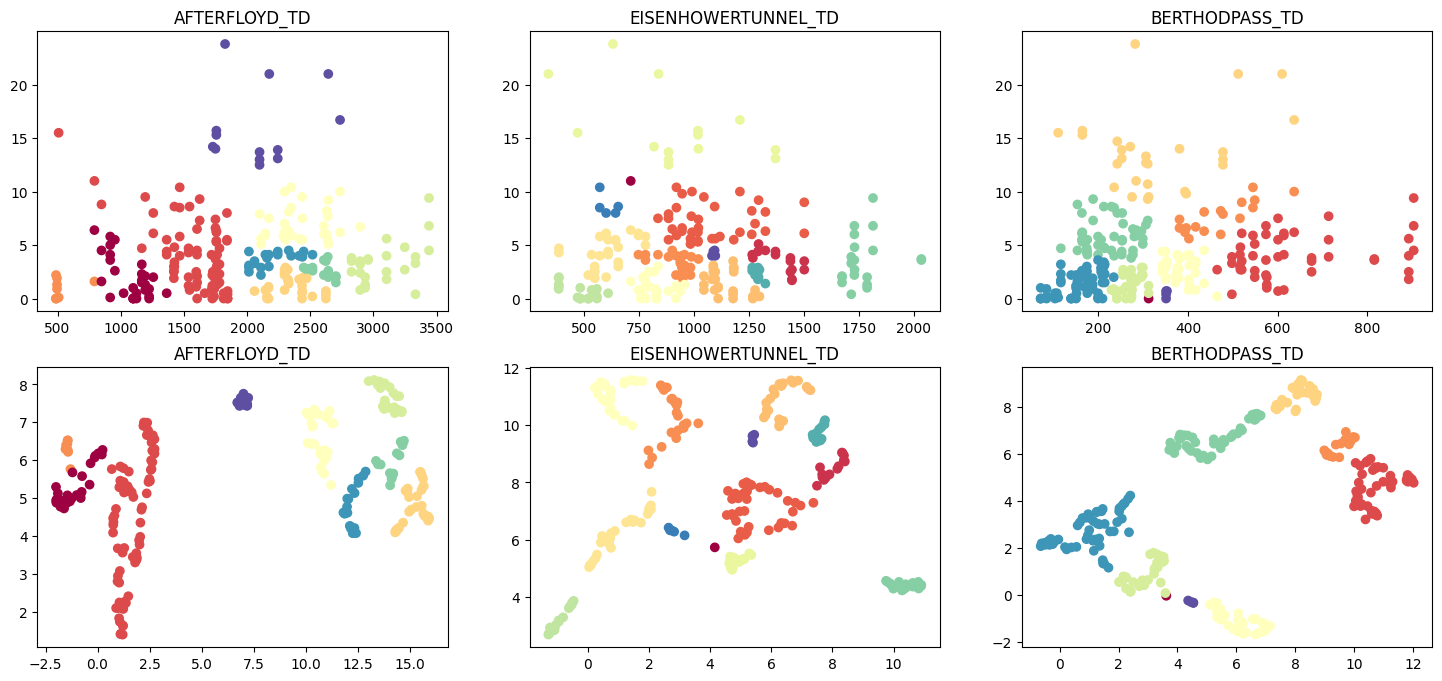

In [15]:
eps = .57

dbscan = DBSCAN(eps=eps,min_samples = 4)
dbscan.fit(embedded_data_af)
labels_af = dbscan.labels_

dbscan = DBSCAN(eps=eps,min_samples = 4)
dbscan.fit(embedded_data_et)
labels_et = dbscan.labels_

dbscan = DBSCAN(eps=eps,min_samples = 4)
dbscan.fit(embedded_data_bp)
labels_bp = dbscan.labels_

fig, ax = plt.subplots(2,3, figsize=(18,8))

scatter = ax[0,0].scatter(data_AF['HOUR7'], data_AF['SNOW_DAY_SUM'], c=labels_af, cmap="Spectral")
ax[0,0].set_title("AFTERFLOYD_TD")

scatter = ax[0,1].scatter(data_ET['HOUR7'], data_ET['SNOW_DAY_SUM'], c=labels_et, cmap="Spectral")
ax[0,1].set_title("EISENHOWERTUNNEL_TD")

scatter = ax[0,2].scatter(data_BP['HOUR7'], data_BP['SNOW_DAY_SUM'], c=labels_bp, cmap="Spectral")
ax[0,2].set_title("BERTHODPASS_TD")

scatter = ax[1,0].scatter(embedded_data_af[:, 0], embedded_data_af[:, 1], c=labels_af, cmap="Spectral")
ax[1,0].set_title("AFTERFLOYD_TD")

scatter = ax[1,1].scatter(embedded_data_et[:, 0], embedded_data_et[:, 1], c=labels_et, cmap="Spectral")
ax[1,1].set_title("EISENHOWERTUNNEL_TD")

scatter = ax[1,2].scatter(embedded_data_bp[:, 0], embedded_data_bp[:, 1], c=labels_bp, cmap="Spectral")
ax[1,2].set_title("BERTHODPASS_TD")

plt.show()

I spent a while checking values for the eps for dbscan. But we can see that it does do a better job compared to before, but still not the best.

Now lets try Self organizing maps

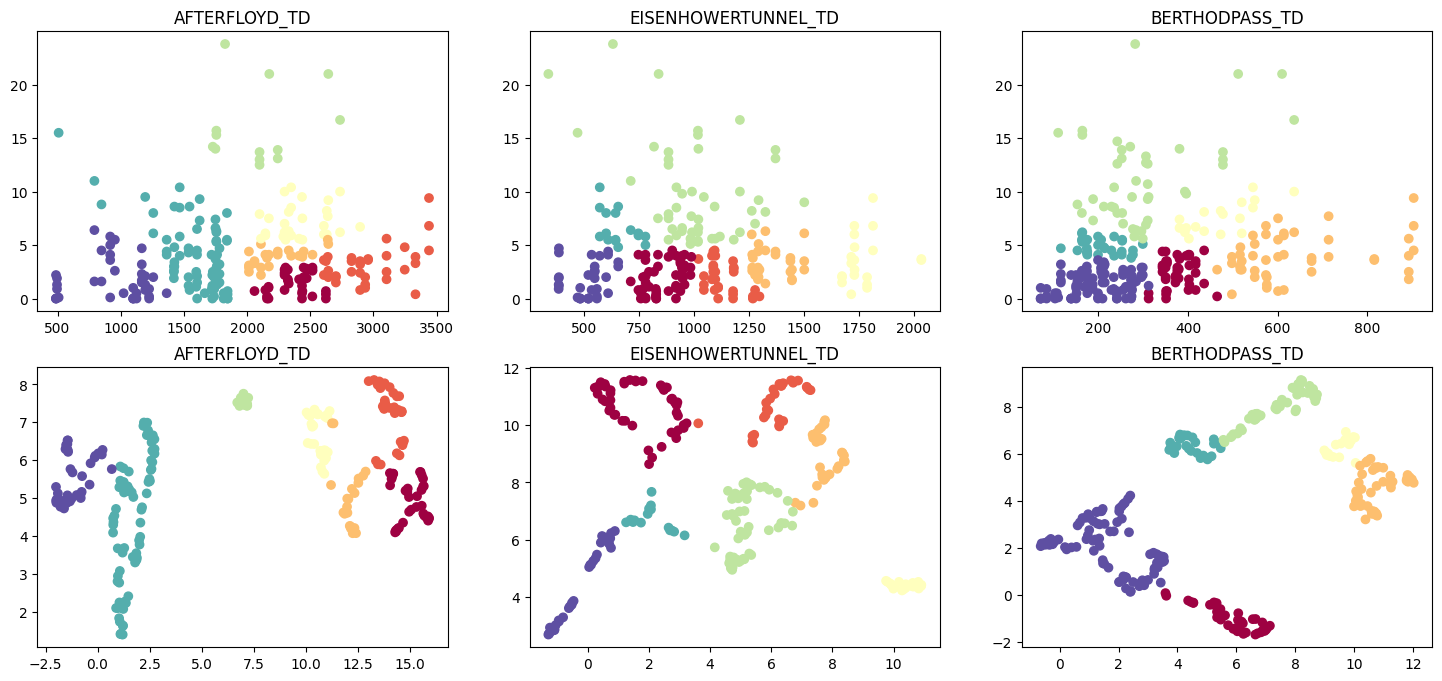

In [16]:
som_data = SOM(m=7, n=1, dim=2)
som_data.fit(embedded_data_af)
labels_af = som_data.predict(embedded_data_af)

som_data = SOM(m=7, n=1, dim=2)
som_data.fit(embedded_data_et)
labels_et = som_data.predict(embedded_data_et)

som_data = SOM(m=7, n=1, dim=2)
som_data.fit(embedded_data_bp)
labels_bp = som_data.predict(embedded_data_bp)

fig, ax = plt.subplots(2,3, figsize=(18,8))

scatter = ax[0,0].scatter(data_AF['HOUR7'], data_AF['SNOW_DAY_SUM'], c=labels_af, cmap="Spectral")
ax[0,0].set_title("AFTERFLOYD_TD")

scatter = ax[0,1].scatter(data_ET['HOUR7'], data_ET['SNOW_DAY_SUM'], c=labels_et, cmap="Spectral")
ax[0,1].set_title("EISENHOWERTUNNEL_TD")

scatter = ax[0,2].scatter(data_BP['HOUR7'], data_BP['SNOW_DAY_SUM'], c=labels_bp, cmap="Spectral")
ax[0,2].set_title("BERTHODPASS_TD")

scatter = ax[1,0].scatter(embedded_data_af[:, 0], embedded_data_af[:, 1], c=labels_af, cmap="Spectral")
ax[1,0].set_title("AFTERFLOYD_TD")

scatter = ax[1,1].scatter(embedded_data_et[:, 0], embedded_data_et[:, 1], c=labels_et, cmap="Spectral")
ax[1,1].set_title("EISENHOWERTUNNEL_TD")

scatter = ax[1,2].scatter(embedded_data_bp[:, 0], embedded_data_bp[:, 1], c=labels_bp, cmap="Spectral")
ax[1,2].set_title("BERTHODPASS_TD")

plt.show()

With the data now set apart and clustered like it makes a lot more sense. In the normal version, Thanks umap.

So how can we use this to answer why Winter Park feels more efficient to get to?
- Find the manifolds that are most common when it comes to traffic. Basically the most inefficient times to go skiing.
- Find how often these manifolds show up so I can find out if one has more of a manifold show up when compared too the other.
- Make sure I am using the best clustering for my data

I feel that the clustering that works best for me is Ward Clustering with Agglomerative Clustering.

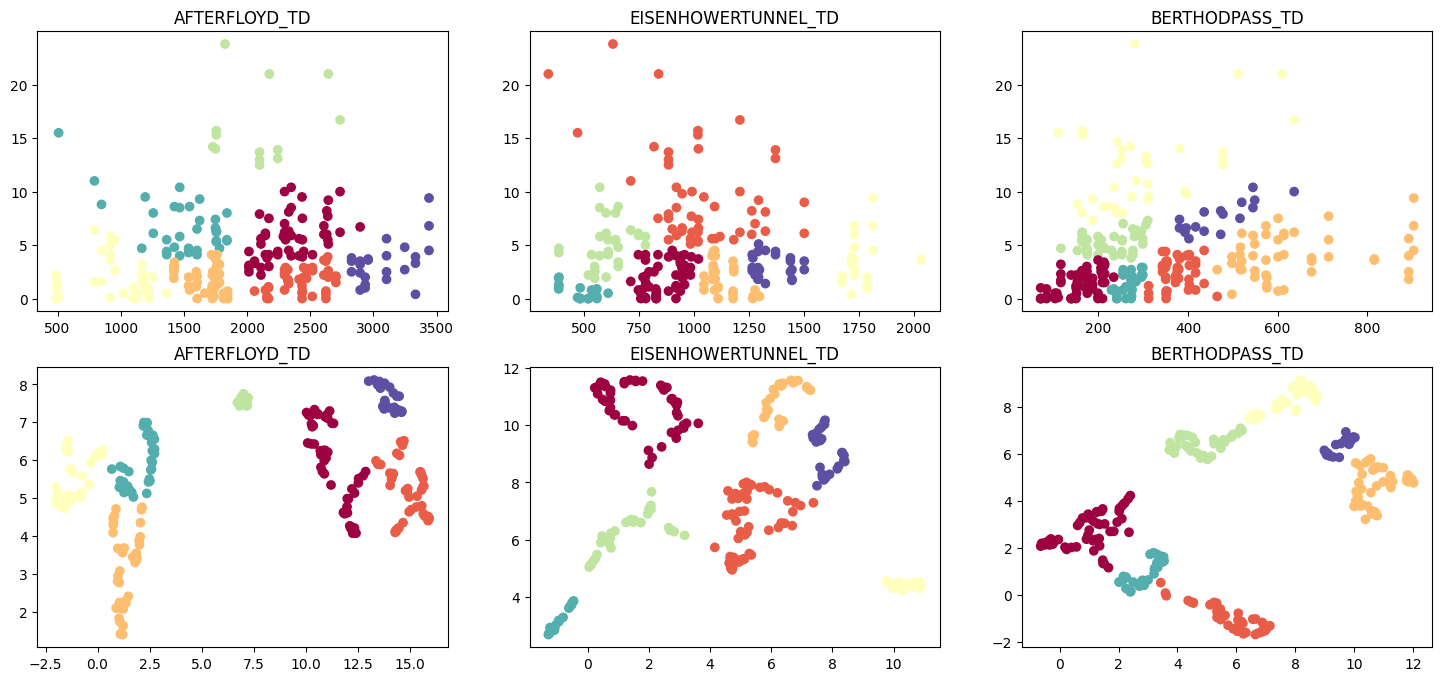

In [17]:
agg = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='ward')
agg.fit(embedded_data_af)
labels_af = agg.labels_

agg = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='ward')
agg.fit(embedded_data_et)
labels_et = agg.labels_

agg = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='ward')
agg.fit(embedded_data_bp)
labels_bp = agg.labels_

fig, ax = plt.subplots(2,3, figsize=(18,8))


scatter = ax[0,0].scatter(data_AF['HOUR7'], data_AF['SNOW_DAY_SUM'], c=labels_af, cmap="Spectral")
ax[0,0].set_title("AFTERFLOYD_TD")

scatter = ax[0,1].scatter(data_ET['HOUR7'], data_ET['SNOW_DAY_SUM'], c=labels_et, cmap="Spectral")
ax[0,1].set_title("EISENHOWERTUNNEL_TD")

scatter = ax[0,2].scatter(data_BP['HOUR7'], data_BP['SNOW_DAY_SUM'], c=labels_bp, cmap="Spectral")
ax[0,2].set_title("BERTHODPASS_TD")

scatter = ax[1,0].scatter(embedded_data_af[:, 0], embedded_data_af[:, 1], c=labels_af, cmap="Spectral")
ax[1,0].set_title("AFTERFLOYD_TD")

scatter = ax[1,1].scatter(embedded_data_et[:, 0], embedded_data_et[:, 1], c=labels_et, cmap="Spectral")
ax[1,1].set_title("EISENHOWERTUNNEL_TD")

scatter = ax[1,2].scatter(embedded_data_bp[:, 0], embedded_data_bp[:, 1], c=labels_bp, cmap="Spectral")
ax[1,2].set_title("BERTHODPASS_TD")

plt.show()

What I would like to note is how nice all of the umap projections are to read. We can see that the far left in the middle of the graph in the middle is consistently the low snow - low traffic section.

- What I would also like to point out is how far the *red* Berthoud projection reaches compared to the *dark blue* Eisenhower Tunnel. This most likely shows that the Berthoud data in that cluster has more than just one small data point in it. I would call this area the *Most Inefficient your road can be*
- What else we can notice is the V that makes up the Berthoud data, although slightly in the Eisenhower data, it is non-existent in the After Floyd Hill data. What does this mean? This shows there is a strong difference on Berthoud when it comes to how snow effects the road. *Probably because Berthoud pass is a single laned road at critical moments*
- When looking at the *yellow* cluster in Berthoud, we can see how much larger it is than the *light blue* cluster. This is also what I would call *The most efficient your road can be*

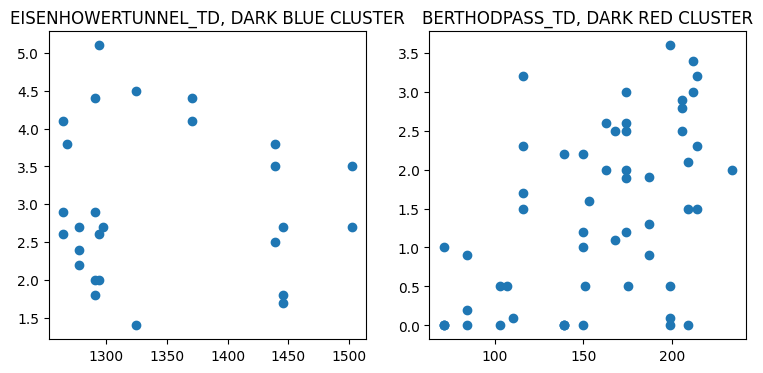

ET total data 27
BP total data 55


In [18]:
fig, ax = plt.subplots(1,2, figsize=(9,4))

curr_et = data_ET[6 == labels_et].reset_index()
curr_bp = data_BP[0 == labels_bp].reset_index()

scatter = ax[0].scatter(curr_et['HOUR7'], curr_et['SNOW_DAY_SUM'])
ax[0].set_title("EISENHOWERTUNNEL_TD, DARK BLUE CLUSTER")

scatter = ax[1].scatter(curr_bp['HOUR7'], curr_bp['SNOW_DAY_SUM'])
ax[1].set_title("BERTHODPASS_TD, DARK RED CLUSTER")

plt.show()
print("ET total data", len(curr_et))
print("BP total data", len(curr_bp))

It is pretty obvious that Eisenhower at its worst is more efficient than Berthoud at its worst, and not only that it also happens less often. This goes against my point I am trying to show, and its that Winter Park is more efficient to get to than through Eisenhower Tunnel resorts.

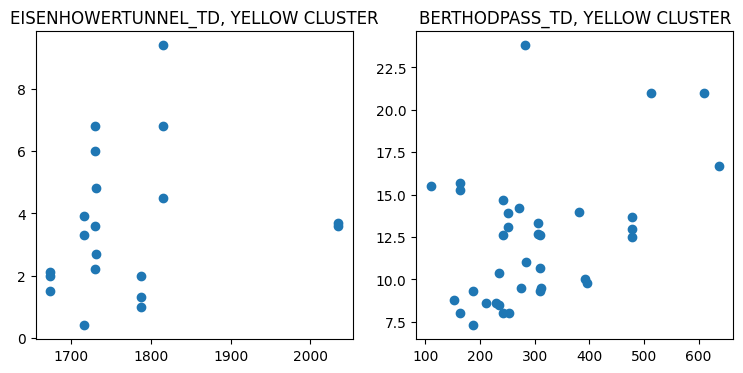

ET total data 20
BP total data 36


In [19]:
fig, ax = plt.subplots(1,2, figsize=(9,4))

curr_et = data_ET[3 == labels_et].reset_index()
curr_bp = data_BP[3 == labels_bp].reset_index()

scatter = ax[0].scatter(curr_et['HOUR7'], curr_et['SNOW_DAY_SUM'])
ax[0].set_title("EISENHOWERTUNNEL_TD, YELLOW CLUSTER")

scatter = ax[1].scatter(curr_bp['HOUR7'], curr_bp['SNOW_DAY_SUM'])
ax[1].set_title("BERTHODPASS_TD, YELLOW CLUSTER")

plt.show()
print("ET total data", len(curr_et))
print("BP total data", len(curr_bp))

On the other side of things, the best Berthoud can be is much more common and better than what the best that Eisenhower offers. Directly opposite of the previous data.

I would like to bring up as well that the *Green, Dark Orange, Light Orange* clusters from Eisenhower are their traffic clusters. Where as the *Light Blue, Dark Orange, Green* clusters represent the same for Berthoud.

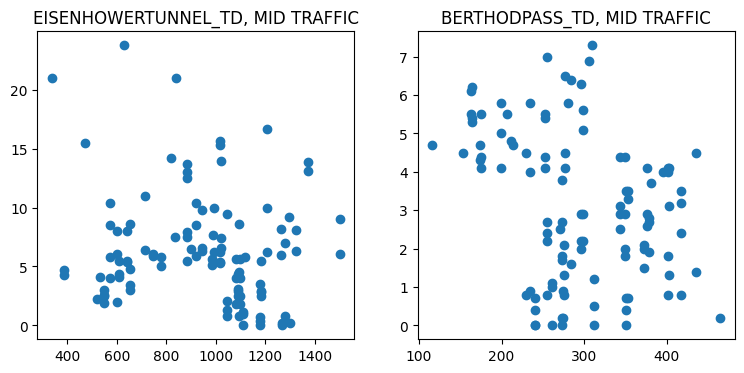

ET total data 111
BP total data 110


In [20]:
fig, ax = plt.subplots(1,2, figsize=(9,4))

curr_et = data_ET[(4 == labels_et) | (1 == labels_et) | (2 == labels_et)].reset_index()
curr_bp = data_BP[(4 == labels_bp) | (1 == labels_bp) | (5 == labels_bp)].reset_index()

scatter = ax[0].scatter(curr_et['HOUR7'], curr_et['SNOW_DAY_SUM'])
ax[0].set_title("EISENHOWERTUNNEL_TD, MID TRAFFIC")

scatter = ax[1].scatter(curr_bp['HOUR7'], curr_bp['SNOW_DAY_SUM'])
ax[1].set_title("BERTHODPASS_TD, MID TRAFFIC")

plt.show()
print("ET total data", len(curr_et))
print("BP total data", len(curr_bp))

We can see that both of them seem to have the Mid traffic about the same so neither creaks ahead.

Looking at the data, this would repersent that both are around as efficient to drive through. Due to this there may be no mathematical reason for why Berthoud Pass feels faster. Exept for one thing. I normally get to Berthoud around 8:30am, not in the 7:00am - 7:59am range. SOOOOOOO......... I will now check for the hour 8 traffic.

First get the data

In [21]:
hour8_af = make_total_data(t="AF", hour=8)
hour8_et = make_total_data(t="ET", hour=8)
hour8_bp = make_total_data(t="BP", hour=8)

Then convert to a umap projection

In [22]:
reducer = umap.UMAP()
hour8_af = hour8_af[["HOUR8", 'SNOW_DAY_SUM']].values
scaler = StandardScaler()
scaled_umap_data = scaler.fit_transform(hour8_af)
embedded_data_af = reducer.fit_transform(scaled_umap_data)

reducer = umap.UMAP()
hour8_et = hour8_et[["HOUR8", 'SNOW_DAY_SUM']].values
scaler = StandardScaler()
scaled_umap_data = scaler.fit_transform(hour8_et)
embedded_data_et = reducer.fit_transform(scaled_umap_data)

reducer = umap.UMAP()
hour8_bp = hour8_bp[["HOUR8", 'SNOW_DAY_SUM']].values
scaler = StandardScaler()
scaled_umap_data = scaler.fit_transform(hour8_bp)
embedded_data_bp = reducer.fit_transform(scaled_umap_data)

C:\Users\wsach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\wsach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\wsach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Next we want to Sort our data using the Agglomerative Clustering with Ward

In [23]:
agg = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='ward')
agg.fit(embedded_data_af)
labels_af_new = agg.labels_

agg = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='ward')
agg.fit(embedded_data_et)
labels_et_new = agg.labels_

agg = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='ward')
agg.fit(embedded_data_bp)
labels_bp_new = agg.labels_

Now we can graph our data!

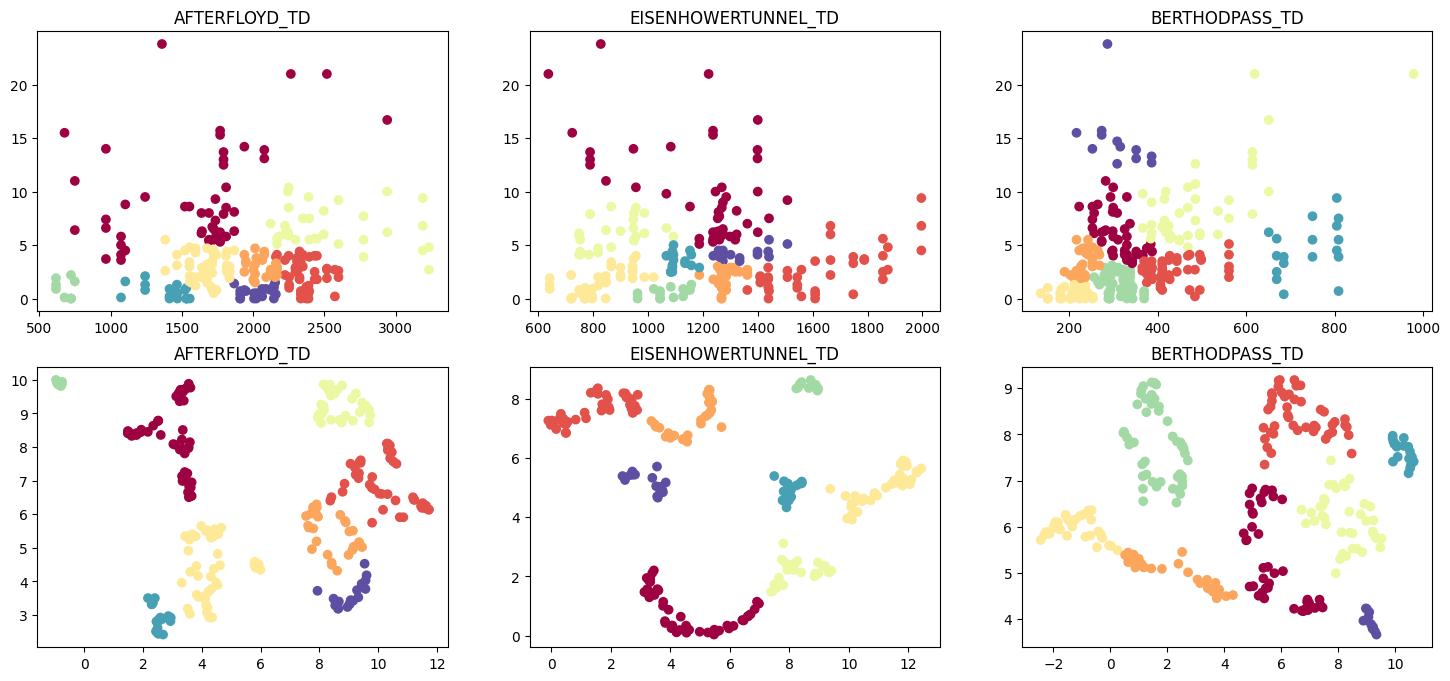

In [24]:
fig, ax = plt.subplots(2,3, figsize=(18,8))

scatter = ax[0,0].scatter(hour8_af[:,0], hour8_af[:, 1], c=labels_af_new, cmap="Spectral")
ax[0,0].set_title("AFTERFLOYD_TD")

scatter = ax[0,1].scatter(hour8_et[:,0], hour8_et[:, 1], c=labels_et_new, cmap="Spectral")
ax[0,1].set_title("EISENHOWERTUNNEL_TD")

scatter = ax[0,2].scatter(hour8_bp[:,0], hour8_bp[:, 1], c=labels_bp_new, cmap="Spectral")
ax[0,2].set_title("BERTHODPASS_TD")

scatter = ax[1,0].scatter(embedded_data_af[:, 0], embedded_data_af[:, 1], c=labels_af_new, cmap="Spectral")
ax[1,0].set_title("AFTERFLOYD_TD")

scatter = ax[1,1].scatter(embedded_data_et[:, 0], embedded_data_et[:, 1], c=labels_et_new, cmap="Spectral")
ax[1,1].set_title("EISENHOWERTUNNEL_TD")

scatter = ax[1,2].scatter(embedded_data_bp[:, 0], embedded_data_bp[:, 1], c=labels_bp_new, cmap="Spectral")
ax[1,2].set_title("BERTHODPASS_TD")

plt.show()

If we where to compare how hour7 relates to hour 8 we can do this.

Text(0.5, 1.0, 'BERTHODPASS_TD, HOUR8')

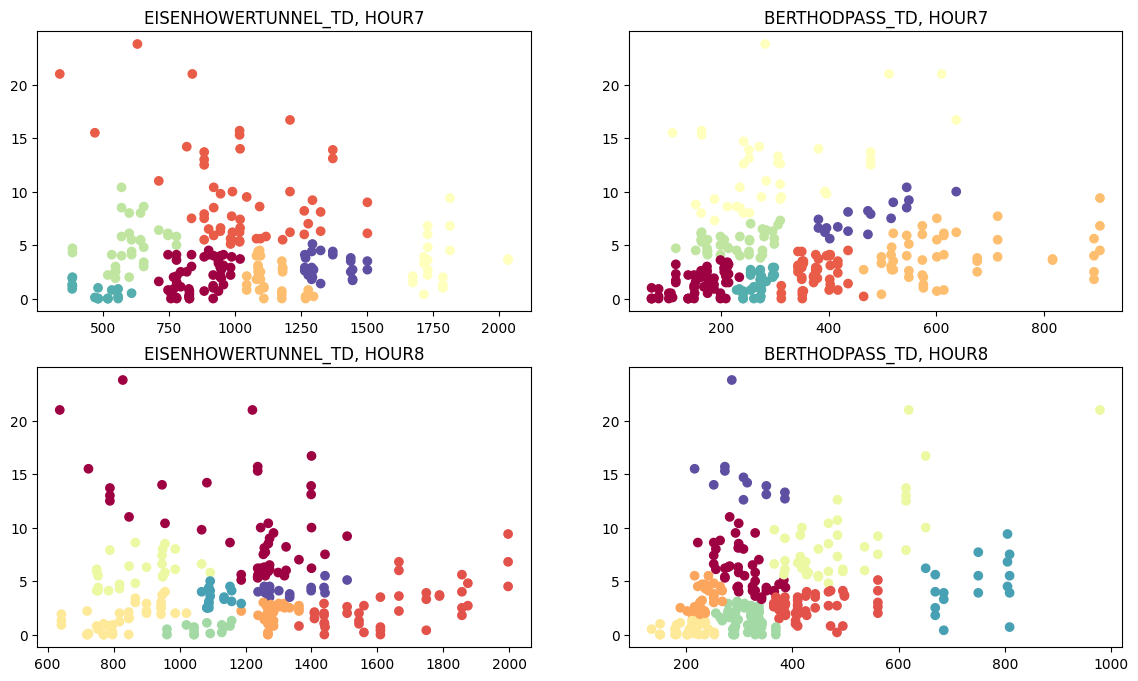

In [25]:
fig, ax = plt.subplots(2,2, figsize=(14,8))

scatter = ax[0,0].scatter(data_ET['HOUR7'], data_ET['SNOW_DAY_SUM'], c=labels_et, cmap="Spectral")
ax[0,0].set_title("EISENHOWERTUNNEL_TD, HOUR7")

scatter = ax[0,1].scatter(data_BP['HOUR7'], data_BP['SNOW_DAY_SUM'], c=labels_bp, cmap="Spectral")
ax[0,1].set_title("BERTHODPASS_TD, HOUR7")

scatter = ax[1,0].scatter(hour8_et[:,0], hour8_et[:, 1], c=labels_et_new, cmap="Spectral")
ax[1,0].set_title("EISENHOWERTUNNEL_TD, HOUR8")

scatter = ax[1,1].scatter(hour8_bp[:,0], hour8_bp[:, 1], c=labels_bp_new, cmap="Spectral")
ax[1,1].set_title("BERTHODPASS_TD, HOUR8")

So this definitely doesn't help my case at all as we can see how the data has slowly moved over to the left on the Berthoud side, where as the Eisenhower Tunnel side shows much less. So I may just need to submit to the tunnel on this one. Before I move on I would like to discuss a couple things. 
- Where the location for the traffic data does matter a lot. I think that the data is mostly incomplete as there is a big issue I have't mentioned yet. The Berthoud pass traffic data collection is right before empire. What is special about empire is it sits about half a mile up the road right before the speed limit goes from 55 - 35. It also lies on a one lane road. Due to this it causes traffic to pile up back a bit, but the acuall Berthoud pass traffic is later on and with inconclusive data I can not definitively say that Berthoud is worse. But with what we have collected. It probably it.

Lets check on some Liner Regression now shall we. I will be testing which Snow_day_sum (My snow window) effects traffic the most. And what hour deviates from the mean the most (in the morning)

Snow Day Sum Check

In [26]:
from tabulate import tabulate
from scipy.stats import linregress

In [27]:
def linear_reg(t="AF",window=7):
    new_data = graphSnow_x(x=window)
    traffic_data = weekdays_total_graph(type=t)
    changes = []
    headers = ["Days", "Slope" ,"Intercept","r_value","p_value","std_err"]
    
    for i in range(0,8):
        new_data['SNOW_DAY_SUM'] = new_data['SNOW'].rolling(window=i).sum()
        new_data.rename(columns={'DOY': 'Snow_DOY', 'YEAR': 'Snow_YEAR'}, inplace=True)
        merged_data = pd.merge(traffic_data, new_data, left_on=['DOY', 'YEAR'], right_on=['Snow_DOY', 'Snow_YEAR'], how='inner')
        curr_data = merged_data.loc[:, ["Mean",'SNOW_DAY_SUM', 'Snow_DOY']]
        curr_data.dropna(subset=['SNOW_DAY_SUM'], inplace=True)
        slope, intercept, r_value, p_value, std_err = linregress(curr_data["Mean"], curr_data['SNOW_DAY_SUM'])
        changes.append((i,slope,intercept,r_value,p_value,std_err))
        
    return changes, headers

After Floyd

In [28]:
data, headers = linear_reg()
print(tabulate(data, headers=headers, tablefmt='grid'))

+--------+--------------+-------------+------------+------------+-------------+
|   Days |        Slope |   Intercept |    r_value |    p_value |     std_err |
+========+==============+=============+============+============+=============+
|      0 |  0           |    0        |  0         | 1          | 0           |
+--------+--------------+-------------+------------+------------+-------------+
|      1 | -0.000515058 |    0.996266 | -0.0910723 | 0.00667479 | 0.000189424 |
+--------+--------------+-------------+------------+------------+-------------+
|      2 | -0.000688571 |    1.70575  | -0.08421   | 0.0121592  | 0.00027404  |
+--------+--------------+-------------+------------+------------+-------------+
|      3 | -0.000759408 |    2.34123  | -0.0754727 | 0.0246698  | 0.000337457 |
+--------+--------------+-------------+------------+------------+-------------+
|      4 | -0.000841965 |    3.00426  | -0.0727744 | 0.0303113  | 0.000388093 |
+--------+--------------+-------------+-

We can see that if it snows within 5 days it will have the most effect on the traffic, this is due to within 5 days having the largest slope value as well as a p_value of less than 0.05, showing that there is a high chance for this to be the case.

Eisenhower Tunnel

In [29]:
data, headers = linear_reg(t="ET")
print(tabulate(data, headers=headers, tablefmt='grid'))

+--------+-------------+-------------+------------+------------+-------------+
|   Days |       Slope |   Intercept |    r_value |    p_value |     std_err |
+========+=============+=============+============+============+=============+
|      0 |  0          |     0       |  0         | 1          | 0           |
+--------+-------------+-------------+------------+------------+-------------+
|      1 | -0.00105568 |     1.1531  | -0.11633   | 0.00105429 | 0.000321086 |
+--------+-------------+-------------+------------+------------+-------------+
|      2 | -0.0013994  |     1.91244 | -0.103985  | 0.00343339 | 0.000476813 |
+--------+-------------+-------------+------------+------------+-------------+
|      3 | -0.00161986 |     2.63988 | -0.0966625 | 0.00654884 | 0.000594181 |
+--------+-------------+-------------+------------+------------+-------------+
|      4 | -0.00180729 |     3.36525 | -0.0931019 | 0.00883549 | 0.000688519 |
+--------+-------------+-------------+------------+-

Looking at this data we can see that within 4 days is actually the most likely to effect traffic when it comes to Eisenhower Tunnel. It also happens to have the highest slope, and an increadibly low p_value at < 0.01.

Berthoud Pass

In [30]:
data, headers = linear_reg(t="BP")
print(tabulate(data, headers=headers, tablefmt='grid'))

+--------+------------+-------------+-----------+-----------+------------+
|   Days |      Slope |   Intercept |   r_value |   p_value |    std_err |
+========+============+=============+===========+===========+============+
|      0 | 0          |    0        | 0         | 1         | 0          |
+--------+------------+-------------+-----------+-----------+------------+
|      1 | 0.00197523 |    0.368572 | 0.0530017 | 0.110091  | 0.00123502 |
+--------+------------+-------------+-----------+-----------+------------+
|      2 | 0.0039129  |    0.747577 | 0.072892  | 0.0278936 | 0.00177672 |
+--------+------------+-------------+-----------+-----------+------------+
|      3 | 0.00429432 |    1.3173   | 0.0649647 | 0.0500992 | 0.00218905 |
+--------+------------+-------------+-----------+-----------+------------+
|      4 | 0.0041043  |    1.95313  | 0.053945  | 0.103894  | 0.00252123 |
+--------+------------+-------------+-----------+-----------+------------+
|      5 | 0.00474489 |  

I believe that this is the hardest data to read but it comes out to showing that within 4 days of snowfall has the greatest effect on traffic data. The slope is not the greatest but it is the only slope that has a p_value ~< 0.05.

Now to check the traffic data

In [31]:
changes = []
for i in range(5, 11):
    curr_data = make_total_data(hour=i)
    slope, intercept, r_value, p_value, std_err = linregress(curr_data[f"HOUR{i}"], curr_data['SNOW_DAY_SUM'])
    changes.append((i,slope,intercept,r_value,p_value,std_err))

headers = ["Hour", "Slope" ,"Intercept","r_value","p_value","std_err"]

data, headers = linear_reg(t="BP")
data = np.array(data)
data[:, 0] += 4
print(tabulate(data, headers=headers, tablefmt='grid'))
        

+--------+------------+-------------+-----------+-----------+------------+
|   Days |      Slope |   Intercept |   r_value |   p_value |    std_err |
+========+============+=============+===========+===========+============+
|      4 | 0          |    0        | 0         | 1         | 0          |
+--------+------------+-------------+-----------+-----------+------------+
|      5 | 0.00197523 |    0.368572 | 0.0530017 | 0.110091  | 0.00123502 |
+--------+------------+-------------+-----------+-----------+------------+
|      6 | 0.0039129  |    0.747577 | 0.072892  | 0.0278936 | 0.00177672 |
+--------+------------+-------------+-----------+-----------+------------+
|      7 | 0.00429432 |    1.3173   | 0.0649647 | 0.0500992 | 0.00218905 |
+--------+------------+-------------+-----------+-----------+------------+
|      8 | 0.0041043  |    1.95313  | 0.053945  | 0.103894  | 0.00252123 |
+--------+------------+-------------+-----------+-----------+------------+
|      9 | 0.00474489 |  

As it looks like in this graph hour 7 deviates the most and is most likely to be the time where the traffic lines up with the rest of the day.

#### Conclusion

As we could see from the data we have looked at there is a lot to do with this data set. Lets recap my questions I was looking to answer: Why does Winter Park feel more efficient to get too? Using Manifolds can I describe the moments of importance in the graph? Can I look at my data through linear regression to show the importance of certain variables?


First looking at getting to Winter Park, we found there was no statistical benefit for going up Berthoud pass other than, we know that Berthoud pass has a higher chance to have good traffic. We also found they have a higher chance to get bad traffic, at least with out incomplete data set. We where able to take our data for After Floyd Hill, which served as the average of the other two, to use as a base line. We then looked at Eisenhower Tunnel which I used to compare with Berthoud Pass as many of the main ski resorts that many people go to are through the tunnel. We then looked at Berthoud pass as it is the main way to get to Winter Park. We took the data for all of these, clustered them to make sence of them. Found out that didn't work so well. Then transformed our data using umap to see the clusters within the manifolds. Then sorted the data again this time giving us accurate clusters. We then projected these clusters back onto the original graph to see where the clusters lied. We then analyzed the graph to see how the data was properly sorted and compared the data.

We then looked at the Linear Regression when looking at both variables. The first being my data for Snow_day_sum. This is what I used the window for, I also was able to check all the values from 1-8 to figure out what deviated the most and caused the biggest decrease in cars per hour. I then looked into what hour causes the biggest change in our traffic data. For these variables we found within 4 days to be the time frame for which traffic data will be effected by snow data on the weekends, and hour 7 happens to give the biggest change in our traffic data.

#### Citations
- Thank you to Colorado Department of Transport for the Traffic data.
  - https://dtdapps.coloradodot.info/otis/TrafficData 
- Thank you to the National Weather Service for providing the Weather Data
  - https://www.weather.gov/help-past-weather/